In [1]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns

In [2]:
# use pandas to import csv 
df = pd.read_csv("C:\\Users\\DSPL\\flight_prices.csv") 
# too see max columns
pd.set_option('display.max_columns',None)
# print dataframe
df

,ID,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
#New dataframe 
new_df = df
#Checking for null values 
print(new_df.isnull().sum()) 
print("Missing values distribution: ")
print(new_df.isnull().mean())

ID                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64
Missing values distribution: 
ID                  0.0
airline             0.0
flight              0.0
source_city         0.0
departure_time      0.0
stops               0.0
arrival_time        0.0
destination_city    0.0
class               0.0
duration            0.0
days_left           0.0
price               0.0
dtype: float64


In [5]:
# #Checking for duplicates
print(new_df.duplicated().any()) 

False


In [6]:
print(new_df.duplicated())
print(new_df.shape) 

0         False
1         False
2         False
3         False
4         False
          ...  
300148    False
300149    False
300150    False
300151    False
300152    False
Length: 300153, dtype: bool
(300153, 12)


In [8]:
#Replacing string values with integer 
new_df["stops"].replace({"zero":"1", "one":"1", "two_or_more":"2"}, inplace = True) 
print(new_df.head())

   ID   airline   flight source_city departure_time stops   arrival_time  \
0   0  SpiceJet  SG-8709       Delhi        Evening     1          Night   
1   1  SpiceJet  SG-8157       Delhi  Early_Morning     1        Morning   
2   2   AirAsia   I5-764       Delhi  Early_Morning     1  Early_Morning   
3   3   Vistara   UK-995       Delhi        Morning     1      Afternoon   
4   4   Vistara   UK-963       Delhi        Morning     1        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [9]:
print(new_df["airline"].unique()) 

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


In [10]:
new_df['departure_time'].replace({'Early_Morning':'5','Morning':'9','Afternoon':'2','Evening':' 7', 'Night':'10'}, inplace = True)
print(new_df.head())

   ID   airline   flight source_city departure_time stops   arrival_time  \
0   0  SpiceJet  SG-8709       Delhi              7     1          Night   
1   1  SpiceJet  SG-8157       Delhi              5     1        Morning   
2   2   AirAsia   I5-764       Delhi              5     1  Early_Morning   
3   3   Vistara   UK-995       Delhi              9     1      Afternoon   
4   4   Vistara   UK-963       Delhi              9     1        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [11]:
#Describing data after preprocessing 
print(new_df.shape) 
print(new_df.head())

(300153, 12)
   ID   airline   flight source_city departure_time stops   arrival_time  \
0   0  SpiceJet  SG-8709       Delhi              7     1          Night   
1   1  SpiceJet  SG-8157       Delhi              5     1        Morning   
2   2   AirAsia   I5-764       Delhi              5     1  Early_Morning   
3   3   Vistara   UK-995       Delhi              9     1      Afternoon   
4   4   Vistara   UK-963       Delhi              9     1        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


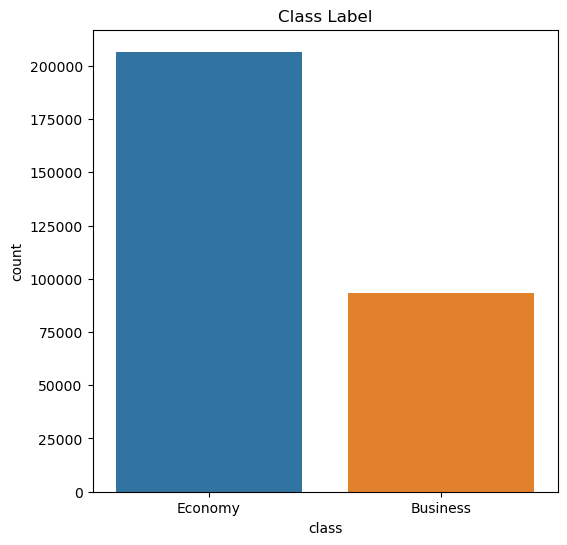

In [14]:

new_df.airline.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='class', data=new_df)
plt.title('Class Label')
plt.show()

In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [2]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [3]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [4]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (700, 2)
Number transactions y_train dataset:  (700,)
Number transactions X_test dataset:  (300, 2)
Number transactions y_test dataset:  (300,)
